In [1]:
import random
import numpy as np
from ParticleClass import hello as hell
from FuncionesGeneradorasListas import FuncionesListas as fl
import matplotlib.pyplot as plt
from FGeneradora import FuncionGeneradora as fg

In [2]:
%load_ext Cython

In [34]:
%%time
%%cython 
#Se importan las cosas necesarias 
from ParticleClass import hello as hell
import timeit
from FuncionesGeneradorasListas import FuncionesListas as fl
import matplotlib.pyplot as plt
from FGeneradora import FuncionGeneradora as fg
import multiprocessing as mp 


def simulate(float v1, float v2, float dt, float Lx, float Ly, int n, float m, float r, int nt):
    cdef int j,k,i   #Fijamos j,k,i como enteros. Estos van a ser las variables con que se itera.
    par = fg.funcion_generadora(Lx,Ly,v1,v2,m,r,n) #se crea la configuración inicial de las partículas
    lista_posiciones = fl.listas_para_llenar_posiciones(n) ## lista que contiene las posiciones de cada partícula 
                                                           ## en cada paso
    lista_velocidades = fl.listas_para_llenar_componentes_velocidad(n) #Lista con las velocidades

    for j in range(nt):

        for k in range(n):
            lista_posiciones[k][0].append(par[k].posicion[0])  #Se añade la posición en x de cada partícula
            lista_posiciones[k][1].append(par[k].posicion[1])  #Se añade la posicion en y de cada partícula
            lista_velocidades[k][0].append(par[k].velocidad[0]) #Se añade la velocidad en x de cada partícula
            lista_velocidades[k][1].append(par[k].velocidad[1]) #Se añade la velocidad en y de cada partícula
        for p in par:     
            for i in range(par.index(p)+1,n): #Revisamos las colisiones entre partículas
                if  p.posicion[0] == par[i].posicion[0] and p.posicion[1] == par[i].posicion[1]:
                    continue 

                elif p.ver_colision_pp(par[i])  :
                    #print("CHOQUE")
                    p.resolver_colision_particula(par[i])
        for p in par: 
            if p.ver_colision_muro(Lx,Ly): #Revisamos las condiciones de choque con la caja
                p.resolver_colision_muro(Lx,Ly)
            elif p.ver_colision_esquina(Lx,Ly): #Revisamos las condiciones de choque con las esquinas
                p.resolver_colision_esquina()
            p.paso_dt(dt)
    return lista_posiciones, lista_velocidades  #Retorna la lista con las posiciones y la lista con las velocidades

#Parametros simulación
v1 = 50  #Velocidad mínima
v2 = 100  #Velocidad máxima
dt = 0.01 #tamaño del paso
Lx = 200 #Tamñaño de la caja 
Ly = 200 
n = 1 #número de partículas
m = 1 #masa 
r = 2 #radio
nt  = 10000 #número de pasos


c = simulate(v1,v2,dt,Lx,Ly,n,m,r,nt)
lista_posiciones = c[0]
lista_velocidades = c[1]

CPU times: user 260 ms, sys: 20.1 ms, total: 281 ms
Wall time: 2.47 s


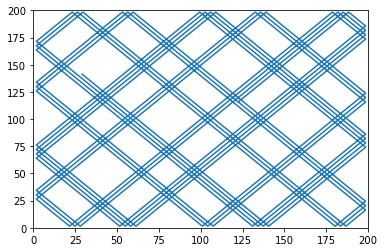

In [35]:
###########################PLOT DE LA TRAYECTORIA DE UNA PARTÍCULA--PARA PRUEBAS###############################
plt.plot(lista_posiciones[0][0],lista_posiciones[0][1])
#plt.plot(lista_posiciones[1][0],lista_posiciones[1][1])
#plt.plot(lista_posiciones[2][0],lista_posiciones[2][1])

plt.xlim((0,200))
plt.ylim((0,200))
plt.show()


In [37]:
lista_posiciones[0]

[[122.92522430419922,
  123.46123106712088,
  123.99723783004254,
  124.5332445929642,
  125.06925135588585,
  125.60525811880751,
  126.14126488172917,
  126.67727164465083,
  127.21327840757249,
  127.74928517049415,
  128.2852919334158,
  128.82129869633746,
  129.35730545925912,
  129.89331222218078,
  130.42931898510244,
  130.9653257480241,
  131.50133251094576,
  132.03733927386742,
  132.57334603678908,
  133.10935279971073,
  133.6453595626324,
  134.18136632555405,
  134.7173730884757,
  135.25337985139737,
  135.78938661431903,
  136.3253933772407,
  136.86140014016235,
  137.397406903084,
  137.93341366600566,
  138.46942042892732,
  139.00542719184898,
  139.54143395477064,
  140.0774407176923,
  140.61344748061396,
  141.14945424353562,
  141.68546100645727,
  142.22146776937893,
  142.7574745323006,
  143.29348129522225,
  143.8294880581439,
  144.36549482106557,
  144.90150158398723,
  145.43750834690888,
  145.97351510983054,
  146.5095218727522,
  147.04552863567386,


In [83]:
#Los datos de las velocidades en .csv
import csv 
with open('datos_velocidades_en_x','w',newline = '') as file:
    writer = csv.writer(file)
    for j in range(n):
        writer.writerow(lista_velocidades[j][0])


In [84]:
#Los datos de las velocidades en .csv
import csv 
with open('datos_velocidades_en_y','w',newline = '') as file:
    writer = csv.writer(file)
    for j in range(n):
        writer.writerow(lista_velocidades[j][1])

In [63]:
for p in par:
    print(p.velocidad)

[  50.58733792 -105.56728296]
[32.17956322 31.46319188]
[-44.28395965  65.22204276]
[-17.03339974 -14.50747146]
[ 58.10143277 -17.45299201]
[-25.81551925 -78.6282893 ]
[  67.79534674 -119.94516698]
[34.86003992 75.13494827]
[-63.15089311 -58.34185203]
[ -53.46225645 -107.78689914]


In [76]:
lista_velocidades[0]

[[52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  -8.818903000844593,
  -8.8189030008445

In [48]:
par[0].velocidad

array([ 85.88483414, -70.7961825 ])